In [2]:
import pandas as pd
import matplotlib.pyplot as pt
import seaborn as sns

In [75]:
df = pd.read_csv("personal_salary_data_cleaned.csv")

In [8]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'job_state', 'same_state', 'age',
       'python_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [9]:
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "machine learning"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"
    
def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "senior"
    elif "jr" in title.lower() or "jr." in title.lower():
        return "jr"
    else:
        return "na"

In [76]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simp, dtype: int64

In [77]:
df['senority'] = df['Job Title'].apply(seniority)
df.senority.value_counts()

na        520
senior    220
jr          2
Name: senority, dtype: int64

In [54]:
#fix LA as state
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip() != "Los Angeles" else "CA")
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [78]:
# Job description Length
df['desc_len'] = df["Job Description"].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [79]:
#competitor count
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != "-1" else 0)

In [80]:
df['num_competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_competitors, Length: 742, dtype: int64

In [74]:
#Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.min_salary, axis =1)
df[ df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,68,96
177,1,84,136
197,1,72,100
202,1,84,136
210,1,60,100
246,1,68,96
271,1,84,136
337,1,72,100
345,1,96,156
357,1,84,136


In [83]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [84]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,spark,aws,excel,desc_len,num_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

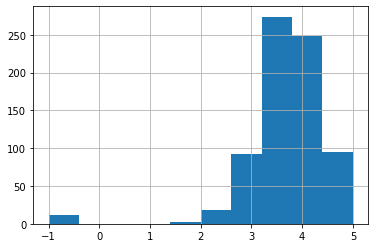

In [87]:
df.Rating.hist()

<AxesSubplot:>

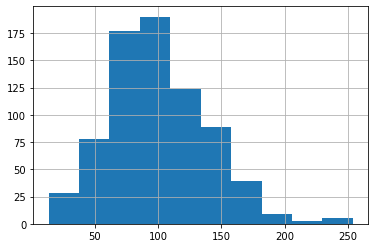

In [88]:
df.avg_salary.hist()

<AxesSubplot:>

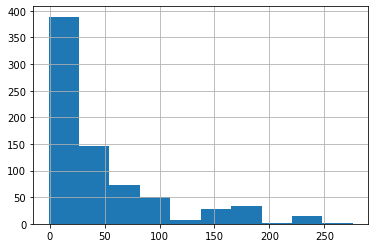

In [89]:
df.age.hist()

<AxesSubplot:>

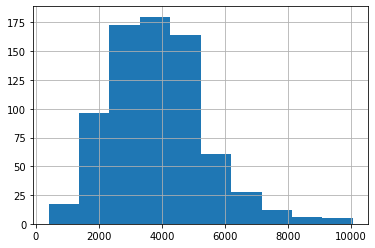

In [90]:
df.desc_len.hist()

<AxesSubplot:>

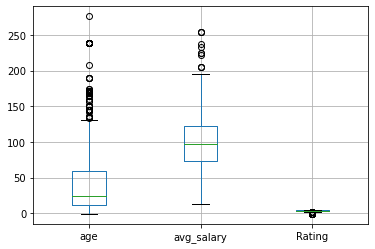

In [94]:
df.boxplot(column = ['age','avg_salary','Rating'])

In [96]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


In [99]:
cmap = 
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'cmap' is not defined

In [182]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'wordcloud'

In [183]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()

NameError: name 'stopwords' is not defined